## LP Optimization 

In [1]:
# import Glop package
from ortools.linear_solver import pywraplp as glp
import lptools as lpt

load D:\anaconda3\Lib\site-packages\ortools\.libs\zlib1.dll...
load D:\anaconda3\Lib\site-packages\ortools\.libs\abseil_dll.dll...
load D:\anaconda3\Lib\site-packages\ortools\.libs\utf8_validity.dll...
load D:\anaconda3\Lib\site-packages\ortools\.libs\re2.dll...
load D:\anaconda3\Lib\site-packages\ortools\.libs\libprotobuf.dll...
load D:\anaconda3\Lib\site-packages\ortools\.libs\highs.dll...
load D:\anaconda3\Lib\site-packages\ortools\.libs\ortools.dll...


In [3]:
#Create LP model object
mymodel = glp.Solver(' Fort Mitchell National Bank ',glp.Solver.GLOP_LINEAR_PROGRAMMING)

In [5]:
inf = mymodel.infinity()

variables = {'Commercial ': (0 ,inf ,0.04 ),    # (lower bound, upper bound, objective coefficient)
             'Mortgage ': (0 ,inf , 0.03 ),
             'Home Equity ': (0 ,inf , 0.035 ),
             'Unsecured ': (0 ,inf , 0.08 )
            }

constraints = {'Mortgage allocation ': (0 ,inf , [-0.15,0.85,-0.15 ,-0.15 ]),    # (lower bound, upper bound, coefficient list)
               'Home equity allocation ': (0 ,inf , [-0.1,-0.1,0.9 ,-0.1 ]),
               'Unsecured allocation ': (-inf ,0 , [-0.2,-0.2,-0.2 ,0.8 ]),
                'Total loans ': (-inf ,10000000 , [1,1,1 ,1 ])
                }

In [7]:
mymodel.Objective().SetMaximization()
for v in variables:
    #print(v)
    #print(variables[v])
    (lb,ub,c) = variables[v]
    var = mymodel.NumVar(lb,ub,v)
    mymodel.Objective().SetCoefficient(var,c)

In [9]:
for c in constraints:
    (lb,ub,coeff_lst) = constraints[c]
    #print(list(zip(mymodel.variables(),coeff_lst)))
    constr = mymodel.Constraint(lb,ub,c)
    for (v,coeff) in zip(mymodel.variables(),coeff_lst):
        constr.SetCoefficient(v,coeff)

In [11]:
lpt.print_model(mymodel)

Variables:
Commercial , Mortgage , Home Equity , Unsecured  

maximize: 0.04*Commercial  + 0.03*Mortgage  + 0.035*Home Equity  + 0.08*Unsecured  

Subject To:
Mortgage allocation : - 0.15*Commercial  + 0.85*Mortgage  - 0.15*Home Equity  - 0.15*Unsecured  >= 0.0
Home equity allocation : - 0.1*Commercial  - 0.1*Mortgage  + 0.9*Home Equity  - 0.1*Unsecured  >= 0.0
Unsecured allocation : - 0.2*Commercial  - 0.2*Mortgage  - 0.2*Home Equity  + 0.8*Unsecured  <= 0.0
Total loans : 1.0*Commercial  + 1.0*Mortgage  + 1.0*Home Equity  + 1.0*Unsecured  <= 10000000.0

Bounds:
Commercial  >= 0.0
Mortgage  >= 0.0
Home Equity  >= 0.0
Unsecured  >= 0.0


In [13]:
#solve model and display results
status = mymodel.Solve()
print(f'Solution Status = {status}')
print(f'Optimal Value = {mymodel.Objective().Value():,.2f}')
for v in mymodel.variables():
    print(f'{v.name():s} = {v.solution_value():.2f}')

Solution Status = 0
Optimal Value = 460,000.00
Commercial  = 5500000.00
Mortgage  = 1500000.00
Home Equity  = 1000000.00
Unsecured  = 2000000.00


In [15]:
# display variable information
print('Variable    LB   Value    UB   Reduced Cost')
for v in mymodel.variables():
    print(f'{v.name():8s}  {v.lb():5.1f}  {v.solution_value():5.1f}  {v.ub():5.1f}  {v.reduced_cost():5.2f}')

Variable    LB   Value    UB   Reduced Cost
Commercial     0.0  5500000.0    inf   0.00
Mortgage     0.0  1500000.0    inf   0.00
Home Equity     0.0  1000000.0    inf   0.00
Unsecured     0.0  2000000.0    inf  -0.00


In [17]:
#display constraint information
print('Constraint    LB    Value  UB     Dual')
for (c,lhs) in zip(mymodel.constraints(),mymodel.ComputeConstraintActivities()):
    print(f'{c.name():10s}  {c.lb():5.1f}  {lhs:5.1f}  {c.ub():5.1f}  {c.dual_value():5.2f}')

Constraint    LB    Value  UB     Dual
Mortgage allocation     0.0    0.0    inf  -0.01
Home equity allocation     0.0    0.0    inf  -0.00
Unsecured allocation    -inf    0.0    0.0   0.04
Total loans    -inf  10000000.0  10000000.0   0.05


### a) The optimal annual return received is \\$460,000, with allocating \\$5,500,000 to Commercial, \\$1,500,000 to Mortgage, $1,000,000 to Home Equity, and \\$2,000,000 to Unsecured 


### b)  The shadow price of Mortgage allocation =-0.01, which mean an increase of addtional 1 unit of the Upper bound in Mort. allocation  will reduce the optimal value by $0.01


In [21]:
import matplotlib.pyplot as plt

### Commercial loans varies from 2% to 7 %

0.02  432500.00
0.03  432500.00
0.04  460000.00
0.05  515000.00
0.06  570000.00
0.07  625000.00


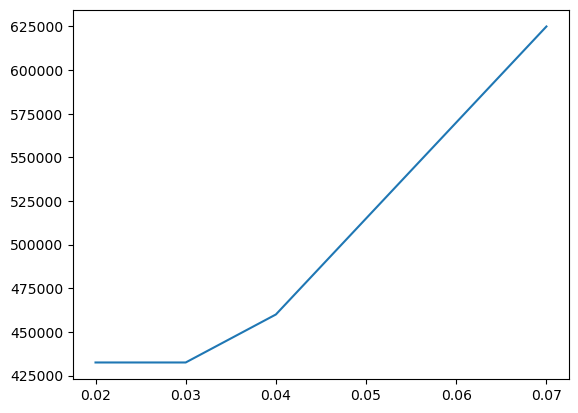

In [24]:
param_lst = [x/100 for x in range(2,8)] # list of Commercial loans values
optval_lst = list()              # list optimal values
var = mymodel.variables()[0]    
for c in param_lst :
    mymodel.Objective().SetCoefficient(var,c)
    mymodel.Solve()
    print(f'{c}  {mymodel.Objective().Value():7.2f}')
    optval_lst.append(mymodel.Objective().Value())
    
mymodel.Objective().SetCoefficient(var, .02)   # Reset Roll Top profit coefficient

plt.plot(param_lst,optval_lst)

### c) The optimal value stay the same when the commercial loan goes from 2% to 3%, from 3% to %4 at rate of \\$27500, and beyond %4 the relationship changes at the rate of $55000  